In [1]:
from clickhouse_driver import Client
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

client = Client('oleg.orbita.work', port=9000, user='student_ml',
                password='CGRV8zemLGgsfdz7Uc6ZJeisGTcPQa',
                settings={'use_numpy': True})

query = "SELECT * FROM students_datas.house_train"
df = client.query_dataframe(query)

In [2]:
# 2.1 Количество данных
print("Количество строк:", df.shape[0])

# 2.2 Количество параметров и список
print("Количество параметров:", df.shape[1])
print("Список параметров:", list(df.columns))

# 2.3 Категориальные признаки
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Категориальные признаки:", categorical_cols)

# 2.4 Первые 5 строк
df.head()

Количество строк: 1460
Количество параметров: 81
Список параметров: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
# Удалим повторы
duplicates = df.duplicated().sum()
print(f"Повторяющихся строк: {duplicates}")
df = df.drop_duplicates()

# Удалим столбцы с более чем 15% пропусков
missing_percent = df.isnull().mean() * 100
to_drop = missing_percent[missing_percent > 15].index.tolist()
print(f"Удаляем столбцы с > 15% пропущенных данных: {to_drop}")
df = df.drop(columns=to_drop)
print("Количество параметров:", df.shape[1])

df = df.dropna()

Повторяющихся строк: 0
Удаляем столбцы с > 15% пропущенных данных: ['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Количество параметров: 74


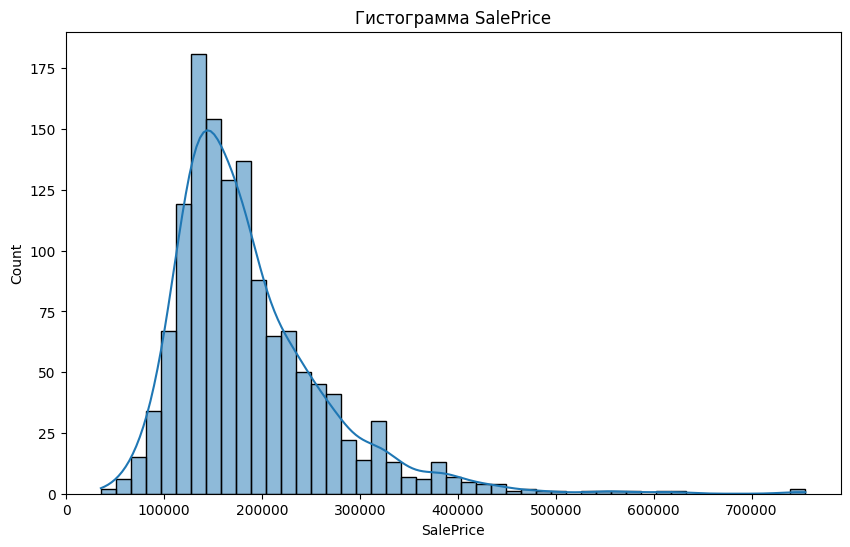

p-value нормальности: 8.508502887039904e-127 → не нормальное распределение


In [4]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Гистограмма SalePrice')
plt.show()

stat, p = normaltest(df['SalePrice'])
print(f'p-value нормальности: {p} → {"нормальное" if p > 0.05 else "не нормальное"} распределение')

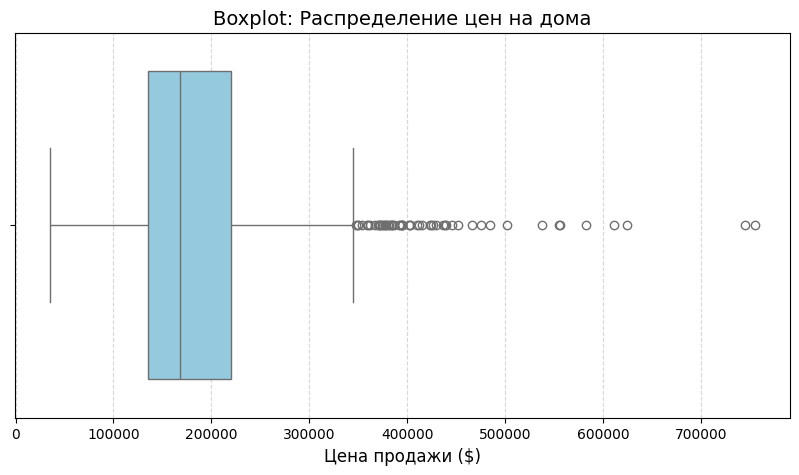

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['SalePrice'], color='skyblue')
plt.title('Boxplot: Распределение цен на дома', fontsize=14)
plt.xlabel('Цена продажи ($)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

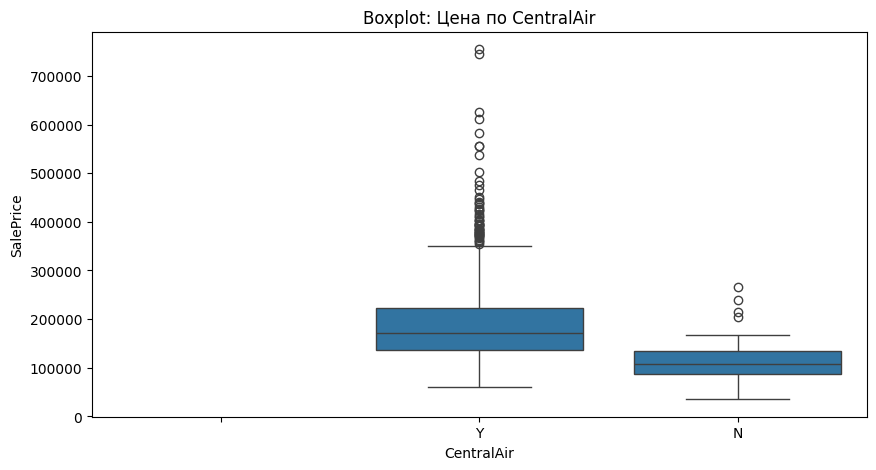

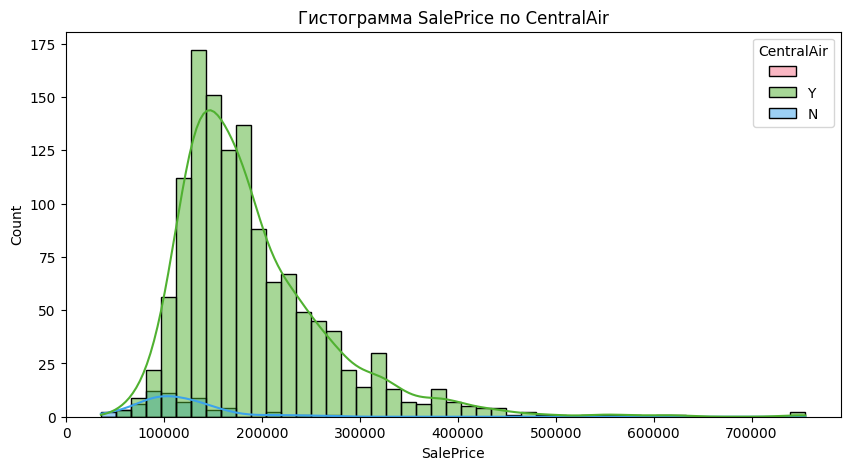

In [6]:
# 6.1 С кондиционером и без
# Boxplot по кондиционеру
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='CentralAir', y='SalePrice')
plt.title('Boxplot: Цена по CentralAir')
plt.show()

# Гистограмма по кондиционеру
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='SalePrice', hue='CentralAir', kde=True, palette='husl')
plt.title('Гистограмма SalePrice по CentralAir')
plt.show()

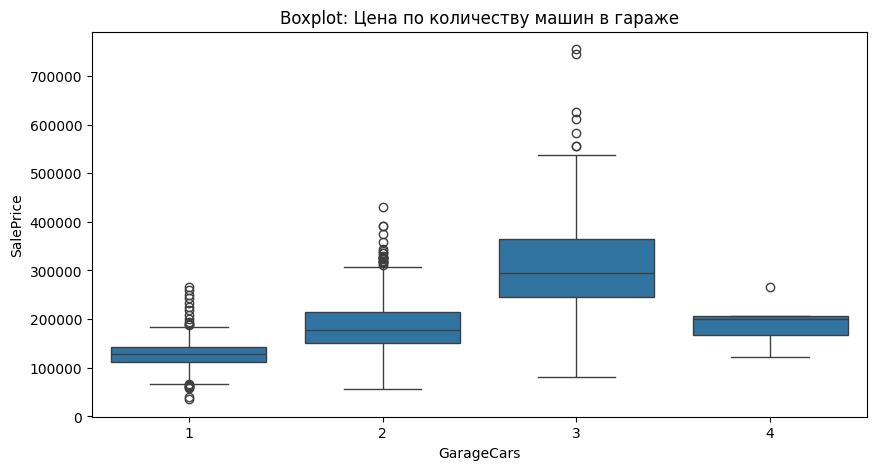

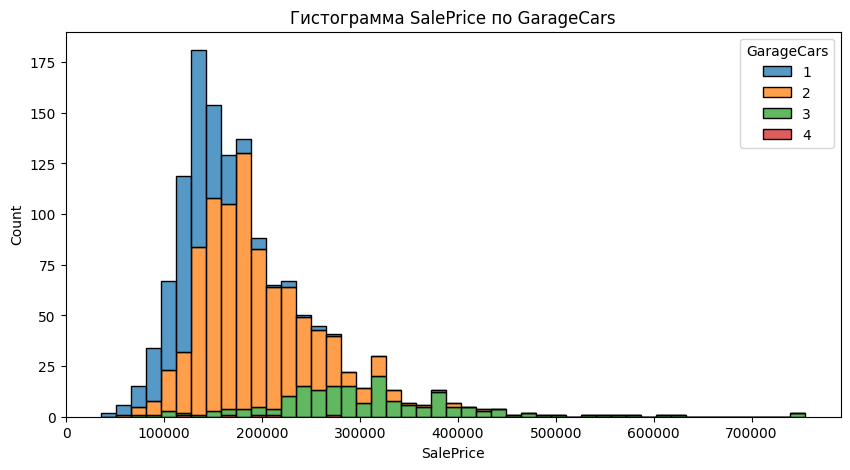

In [7]:
# 6.2 По GarageCars
# Boxplot по количеству машин в гараже
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='GarageCars', y='SalePrice')
plt.title('Boxplot: Цена по количеству машин в гараже')
plt.show()

# Гистограмма SalePrice по GarageCars
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='SalePrice', hue='GarageCars', multiple='stack', palette='tab10')
plt.title('Гистограмма SalePrice по GarageCars')
plt.show()

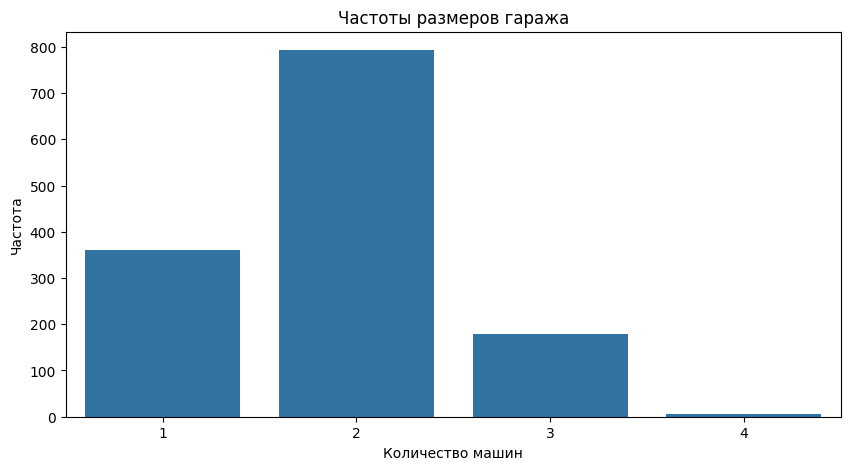

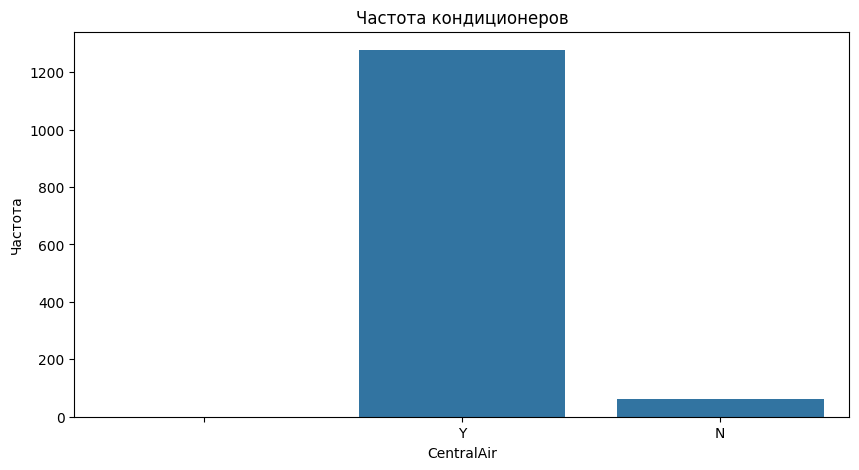

In [8]:
# 7.1 Размеры гаража
plt.figure(figsize=(10, 5))
sns.countplot(x='GarageCars', data=df)
plt.title('Частоты размеров гаража')
plt.xlabel('Количество машин')
plt.ylabel('Частота')
plt.show()

# 7.2 Кондиционирование
plt.figure(figsize=(10, 5))
sns.countplot(x='CentralAir', data=df)
plt.title('Частота кондиционеров')
plt.xlabel('CentralAir')
plt.ylabel('Частота')
plt.show()

In [9]:
# 8.1 с продажной ценой между 25-м процентилем и 75-м процентилем .
q1 = df['SalePrice'].quantile(0.25)  # нижний квартиль
q3 = df['SalePrice'].quantile(0.75)  # верхний квартиль

# Отбираем дома, у которых цена находится между этими процентилями
in_range = df[(df['SalePrice'] >= q1) & (df['SalePrice'] <= q3)]

# Считаем долю таких домов от общего количества
print("Доля домов в интервале (25%-75%) по SalePrice:", len(in_range) / len(df))

Доля домов в интервале (25%-75%) по SalePrice: 0.5067264573991032


In [10]:
# 8.2 Рассчитайте долю домов с общей площадью в квадратных футах от 25-го процентиля до 75-го процентиля .

# Квантили для площади
q1_area = df['GrLivArea'].quantile(0.25)
q3_area = df['GrLivArea'].quantile(0.75)

# Фильтруем дома, попадающие в этот диапазон
area_in_range = df[(df['GrLivArea'] >= q1_area) & (df['GrLivArea'] <= q3_area)]

# Выводим долю домов с площадью между 25 и 75 процентилем
print("Доля домов с GrLivArea в интервале (25%-75%):", len(area_in_range) / len(df))

Доля домов с GrLivArea в интервале (25%-75%): 0.4992526158445441


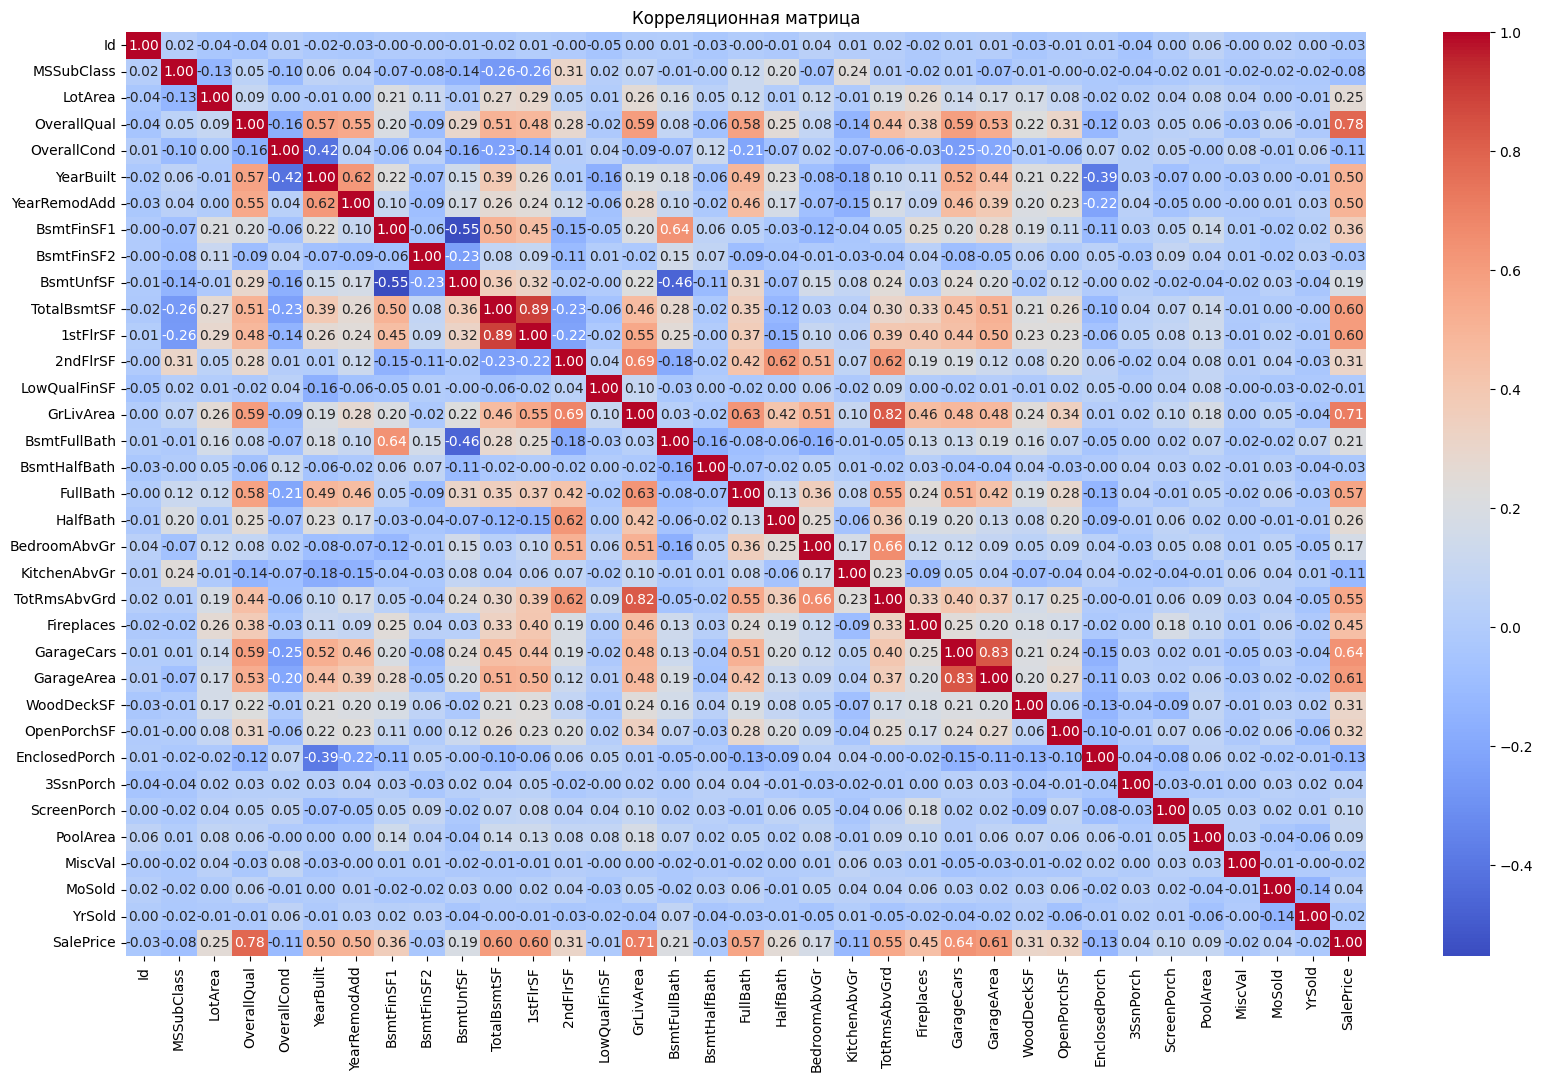

10 параметров с наибольшей корреляцией с SalePrice:
OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
YearRemodAdd    0.501435
Name: SalePrice, dtype: float64


In [11]:
# 9 Корреляционная матрица

# Вычисляем матрицу корреляции (только для числовых столбцов)
corr = df.corr(numeric_only=True)

# Тепловая карта
plt.figure(figsize=(20, 12))
# Визуализируем корреляции в виде тепловой карты
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Корреляционная матрица')
plt.show()

# Топ-10 корреляций с SalePrice
# abs() — берём абсолютное значение, чтобы учесть и положительную и отрицательную корреляцию, sort_values() — сортируем по убыванию, 
# [1:11] — пропускаем сам SalePrice
top_corr = corr['SalePrice'].abs().sort_values(ascending=False)[1:11]
print("10 параметров с наибольшей корреляцией с SalePrice:")
print(top_corr)